In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("INNHotelsGroup.csv")

In [3]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


# We can observe that the median and mean values of non - cancelled room is less than the price of overall room. While the mean and median price of cancelled room is on the higher side of the average room price

In [4]:
avg_price_not_cancelled_room = df.loc[(df['booking_status']=='Not_Canceled')]
print(avg_price_not_cancelled_room['avg_price_per_room'].mean())
print(avg_price_not_cancelled_room['avg_price_per_room'].median())
print(avg_price_not_cancelled_room['avg_price_per_room'].max())
df['avg_price_per_room'].mean()
# df['avg_price_per_room'].median()
avg_price_cancelled_room = df.loc[(df['booking_status']=='Canceled')]
print(avg_price_cancelled_room['avg_price_per_room'].mean())
print(avg_price_cancelled_room['avg_price_per_room'].median())
print(avg_price_cancelled_room['avg_price_per_room'].max())

99.93141164411644
95.0
375.5
110.58996634413126
108.0
540.0


In [5]:
marktsgmt = df['market_segment_type']
bookingst = df['booking_status']

In [6]:
mst = list(marktsgmt.unique())

In [7]:
mst

['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary']

# Market segment type "online" shows highest cancellation(approx 37%) while complementary shows the lowest cancellation

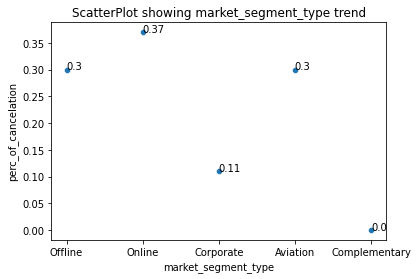

In [8]:
Cancelled_bookings = []
mapped = []


# iterate through the Months df to group total guests to each month
for i in mst:
    cancelled_only = df[
        (df.market_segment_type == i) & (df.booking_status == "Canceled")
    ]
    all_bookings = df[df.market_segment_type == i]
    # Calculate percentage of special requests that cancelled
    perc_Calculation = round(
        cancelled_only.market_segment_type.count() / all_bookings.market_segment_type.count(), 2
    )
    # Append data to prep for df
    Cancelled_bookings.append(
        {"market_segment_type": i, "perc_of_cancelation": perc_Calculation}
    )
    mapped.append(perc_Calculation)


    # Create df
total_cancelled_booking_sr_df = pd.DataFrame(Cancelled_bookings)

sns.scatterplot(
    data=total_cancelled_booking_sr_df,
    x="market_segment_type",
    y="perc_of_cancelation",
)
plt.title("ScatterPlot showing market_segment_type trend")
for i, label in enumerate(mapped):
    plt.annotate(
        label,
        (
            total_cancelled_booking_sr_df.market_segment_type[i],
            total_cancelled_booking_sr_df.perc_of_cancelation[i],
        ),
    )

plt.show()

In [9]:
# can add custom labels
df["lead_time_bin"] = pd.cut(
    df["lead_time"],
    [-np.inf, 15, 30, 90, 180, 365, np.inf],
    labels=["15",
        "15-30",
        "30-90",
        "90-180",
        "180-365",
        "more_than_1_year",
    ],
)
df.drop(["lead_time"], axis=1, inplace=True)
df["lead_time_bin"].value_counts(dropna=False)


30-90               10815
15                   8683
90-180               7772
180-365              5034
15-30                3728
more_than_1_year      243
Name: lead_time_bin, dtype: int64

In [10]:
ltb = list(df["lead_time_bin"].unique())

In [11]:
ltb

['180-365', '15', '30-90', '90-180', '15-30', 'more_than_1_year']

# When lead time is more than an year, chances of cancellations = 95%
# When lead time is between 180-365 days, chances of cancellation = 73%
# When lead time is between 90-180 days, chances of cancellation = 45%
# Hence, we can see that as the lead time increase, cancellation also increases



Plot after re-sizing: 


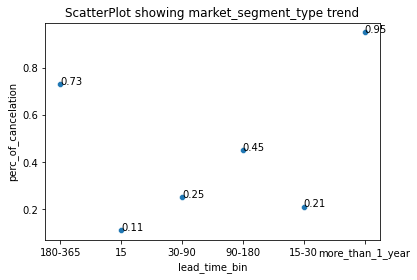

<Figure size 720x720 with 0 Axes>

In [12]:
Cancelled_bookings = []
mapped = []


for i in ltb:
    cancelled_only = df[
        (df.lead_time_bin == i) & (df.booking_status == "Canceled")
    ]
    all_bookings = df[df.lead_time_bin == i]
    
    perc_Calculation = round(
        cancelled_only.lead_time_bin.count() / all_bookings.lead_time_bin.count(), 2
    )
    # Append data to prep for df
    Cancelled_bookings.append(
        {"lead_time_bin": i, "perc_of_cancelation": perc_Calculation}
    )
    mapped.append(perc_Calculation)

total_cancelled_booking_sr_df = pd.DataFrame(Cancelled_bookings)

sns.scatterplot(
    data=total_cancelled_booking_sr_df,
    x="lead_time_bin",
    y="perc_of_cancelation",
)
plt.title("ScatterPlot showing market_segment_type trend")
for i, label in enumerate(mapped):
    plt.annotate(
        label,
        (
            total_cancelled_booking_sr_df.lead_time_bin[i],
            total_cancelled_booking_sr_df.perc_of_cancelation[i],
        ),
    )

    
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
  
print("Plot after re-sizing: ")
# plt.plot(x, y)
plt.show()
# plt.show()

In [13]:
df.describe(include='all')


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,lead_time_bin
count,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275
unique,36275,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,2,6
top,INN00001,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled,30-90
freq,1,NaN,NaN,NaN,NaN,27835,NaN,28130,NaN,NaN,NaN,23214,NaN,NaN,NaN,NaN,NaN,24390,10815
mean,NaN,1.844962,0.105279,0.810724,2.204300,NaN,0.030986,NaN,2017.820427,7.423653,15.596995,NaN,0.025637,0.023349,0.153411,103.423539,0.619655,NaN,NaN
std,NaN,0.518715,0.402648,0.870644,1.410905,NaN,0.173281,NaN,0.383836,3.069894,8.740447,NaN,0.158053,0.368331,1.754171,35.089424,0.786236,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,80.300000,0.000000,NaN,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,2018.000000,8.000000,16.000000,NaN,0.000000,0.000000,0.000000,99.450000,0.000000,NaN,NaN
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,120.000000,1.000000,NaN,NaN


In [14]:
print(df.isnull().sum().sum())

0


In [15]:

df["dateInt"] = (
    df["arrival_year"].astype(str)
    + "-"
    + df["arrival_month"].astype(str).str.zfill(2)
    + "-"
    + df["arrival_date"].astype(str).str.zfill(2)
)

# Convert the DateInt Colum to a datetime dtype
df = df[df["dateInt"] != "2018-02-29"]
df["Date"] = pd.to_datetime(df["dateInt"], format="%Y-%m-%d")
df = df.drop("dateInt", axis=1)

#Convert Date to day of week
df["DayofWeek"] = df["Date"].dt.day_name().astype("category")
df = df.drop("arrival_date", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36238 entries, 0 to 36274
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Booking_ID                            36238 non-null  object        
 1   no_of_adults                          36238 non-null  int64         
 2   no_of_children                        36238 non-null  int64         
 3   no_of_weekend_nights                  36238 non-null  int64         
 4   no_of_week_nights                     36238 non-null  int64         
 5   type_of_meal_plan                     36238 non-null  object        
 6   required_car_parking_space            36238 non-null  int64         
 7   room_type_reserved                    36238 non-null  object        
 8   arrival_year                          36238 non-null  int64         
 9   arrival_month                         36238 non-null  int64         
 10

/home/tanya/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [16]:
#Mapping number of childern
df["no_of_children_bin"] = pd.cut(
    df["no_of_children"],
    [-np.inf, 0, 1, 2, 3, np.inf],
    labels=["0", "1", "2", "3", "4 or more"],
)
df.drop(["no_of_children"], axis=1, inplace=True)
df["no_of_children_bin"].value_counts(dropna=False)

0            33544
1             1616
2             1056
3               19
4 or more        3
Name: no_of_children_bin, dtype: int64

In [17]:
# mapping no of previous bookings
df["no_of_previous_bookings_not_canceled_bin"] = pd.cut(
    df["no_of_previous_bookings_not_canceled"],
    [-np.inf, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, np.inf],
    labels=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11 or more"],
)
df.drop(["no_of_previous_bookings_not_canceled"], axis=1, inplace=True)
df["no_of_previous_bookings_not_canceled_bin"].value_counts(dropna=False)

0             35429
1               227
11 or more      145
2               112
3                80
4                65
5                60
6                36
7                24
8                23
9                19
10               18
Name: no_of_previous_bookings_not_canceled_bin, dtype: int64

In [18]:
# mapping prev cancellations
df["no_of_previous_cancellations_bin"] = pd.cut(
    df["no_of_previous_cancellations"],
    [-np.inf, 0, 1, 2, 3, 4, 5, np.inf],
    labels=["0", "1", "2", "3", "4", "5", "6 or more"],
)
df.drop(["no_of_previous_cancellations"], axis=1, inplace=True)
df["no_of_previous_cancellations_bin"].value_counts(dropna=False)

0            35901
1              197
2               46
3               43
6 or more       30
5               11
4               10
Name: no_of_previous_cancellations_bin, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36238 entries, 0 to 36274
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Booking_ID                                36238 non-null  object        
 1   no_of_adults                              36238 non-null  int64         
 2   no_of_weekend_nights                      36238 non-null  int64         
 3   no_of_week_nights                         36238 non-null  int64         
 4   type_of_meal_plan                         36238 non-null  object        
 5   required_car_parking_space                36238 non-null  int64         
 6   room_type_reserved                        36238 non-null  object        
 7   arrival_year                              36238 non-null  int64         
 8   arrival_month                             36238 non-null  int64         
 9   market_segment_type         

In [20]:

df = df.drop("Booking_ID", axis=1)

# #dtype object to categories
columns_o = df.select_dtypes(include=["object"]).columns.tolist()
for colname in columns_o:
    df[colname] = df[colname].astype("category")

df.info()


# Iterate through the category columns, convert to a list, and print the value counts of each.
columns_c = df.select_dtypes(include=["category"]).columns.tolist()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36238 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   no_of_adults                              36238 non-null  int64         
 1   no_of_weekend_nights                      36238 non-null  int64         
 2   no_of_week_nights                         36238 non-null  int64         
 3   type_of_meal_plan                         36238 non-null  category      
 4   required_car_parking_space                36238 non-null  int64         
 5   room_type_reserved                        36238 non-null  category      
 6   arrival_year                              36238 non-null  int64         
 7   arrival_month                             36238 non-null  int64         
 8   market_segment_type                       36238 non-null  category      
 9   repeated_guest              

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
booking_status_encoded = le.fit_transform(df["booking_status"])

df["booking_status_encoded"] = booking_status_encoded

In [22]:

drop_var = ["booking_status", "Date", "booking_status_encoded"]
X = df.drop(drop_var, axis="columns")  
y = df["booking_status_encoded"]

#Chnaging categorical to numeric using dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36238 entries, 0 to 36274
Data columns (total 54 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   no_of_adults                                         36238 non-null  int64  
 1   no_of_weekend_nights                                 36238 non-null  int64  
 2   no_of_week_nights                                    36238 non-null  int64  
 3   required_car_parking_space                           36238 non-null  int64  
 4   arrival_year                                         36238 non-null  int64  
 5   arrival_month                                        36238 non-null  int64  
 6   repeated_guest                                       36238 non-null  int64  
 7   avg_price_per_room                                   36238 non-null  float64
 8   no_of_special_requests                               36238 non-nul

In [23]:
from sklearn.model_selection import train_test_split


In [24]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)

print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])


Number of rows in train data = 25366
Number of rows in test data = 10872


In [25]:

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train) 
xtest = sc_x.transform(X_test)


In [26]:

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,C=0.03359818286283781)
classifier.fit(xtrain, y_train)

LogisticRegression(C=0.03359818286283781, random_state=0)

# The customers who have more number of special requests, offline market segment type, repeated guest have less chances of cancellation

# The customers who have high lead time are more likely to cancel their bookings.

In [27]:
log_odds = classifier.coef_[0]
pd.DataFrame(log_odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
no_of_special_requests,1.162875
market_segment_type_Offline,0.583864
market_segment_type_Complementary,0.319141
repeated_guest,0.268490
required_car_parking_space,0.264296
room_type_reserved_Room_Type 6,0.142856
market_segment_type_Corporate,0.111175
no_of_previous_bookings_not_canceled_bin_2,0.108795
room_type_reserved_Room_Type 4,0.096457
room_type_reserved_Room_Type 7,0.091477


Plot after re-sizing: 


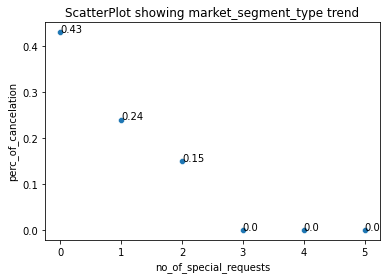

<Figure size 720x720 with 0 Axes>

In [28]:
Cancelled_bookings = []
mapped = []
special_request = np.arange(0,6)


for i in special_request:
    cancelled_only = df[
        (df.no_of_special_requests == i) & (df.booking_status == "Canceled")
    ]
    all_bookings = df[df.no_of_special_requests == i]
    
    perc_Calculation = round(
        cancelled_only.no_of_special_requests.count() / all_bookings.no_of_special_requests.count(), 2
    )
    # Append data to prep for df
    Cancelled_bookings.append(
        {"no_of_special_requests": i, "perc_of_cancelation": perc_Calculation}
    )
    mapped.append(perc_Calculation)

total_cancelled_booking_sr_df = pd.DataFrame(Cancelled_bookings)

sns.scatterplot(
    data=total_cancelled_booking_sr_df,
    x="no_of_special_requests",
    y="perc_of_cancelation",
)
plt.title("ScatterPlot showing market_segment_type trend")
for i, label in enumerate(mapped):
    plt.annotate(
        label,
        (
            total_cancelled_booking_sr_df.no_of_special_requests[i],
            total_cancelled_booking_sr_df.perc_of_cancelation[i],
        ),
    )

    
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
  
print("Plot after re-sizing: ")
# plt.plot(x, y)
plt.show()
# plt.show()

In [29]:
y_pred = classifier.predict(xtest)


In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[2218 1346]
 [ 807 6501]]


In [31]:

from sklearn.metrics import accuracy_score,classification_report
print("Accuracy is",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy is 0.8019683590875644
              precision    recall  f1-score   support

           0       0.73      0.62      0.67      3564
           1       0.83      0.89      0.86      7308

    accuracy                           0.80     10872
   macro avg       0.78      0.76      0.77     10872
weighted avg       0.80      0.80      0.80     10872



# Recommendations

1. The customers which have high lead time, Conformation mail/ call should be sent to the customers 15 days before arrival date to avoid last moment cancellation. 
2. To the customers which cancel their booking and they have a special request, should be peanalised(eg - 5% additional deduction from refund amount)
3. For repeated guests, add-ons (complementary breakfast, tea/coffee) could be provided. 
4. To attract more online customers, Discounts and offers could be provided for Online market segment. 


